# Example III-1
# Linear Algebra Review with a Few Numpy Operations

In [ ]:
import numpy as np
# numpy examples (these will work for python 3 only)
# in python 3, they have overloaded the @ operator to perform matrix multiplication

a = np.array([[0,1,2],
              [3,4,5]])

print(a)
print('---')
print(a.T)
print('---')
print(a.flatten())

In [ ]:
a = np.array([1,2], float)
b = np.array([3,4,5,6], float)
c = np.array([7,8,9], float)
np.concatenate((a, b, c))

In [ ]:
a = np.array([[1, 2], [3, 4]], float)
b = np.array([[5, 6], [7,8]], float)
np.concatenate((a,b))

In [ ]:
print(np.concatenate((a,b), axis=0))
print(np.concatenate((a,b), axis=1))

In [ ]:
a = np.array([1, 2, 3], float)
print(a)
print('---')
print(a[:,np.newaxis])
print('---')
print(a[:,np.newaxis].shape)

In [ ]:
print(b[np.newaxis,:])
print('---')
print(b[np.newaxis,:].shape)

In [ ]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)

print('+ ', a + b)
print('- ', a - b)
print('* ', a * b)
print('/ ', a / b)
print('% ', a % b)
print('**', b**a)
print('@ ', a @ b)

In [ ]:
# broadcasting
a = np.array([[1, 2], [3, 4], [5, 6]], float)
b = np.array([-1, 3], float)
a
b

print(a + b)

In [ ]:
np.unique([0,3,56,63,45,3234,3,24,76,4,234,6,3])

In [ ]:
#  indexing
a = np.array([[1, 4.5, 1500],
              [5, 3.5, 800],
              [2, 0.5, 1300]])

print(a[:,0])
print(a[0,:])

In [ ]:
print(a[:,0]>=2)
print('---')
print(a[ a[:,0]>=2 ])

In [ ]:
print(np.trace(a))
print('---')
print(np.diagonal(a))
print('---')

v = np.diagonal(a)
print(np.sum(v))
print('---')
print(np.diag(v))

In [ ]:
from numpy import linalg as lin
print(lin.det(a))
print('---')
print(lin.inv(a))

In [ ]:
vals, vects =lin.eig(a)
print(vals)
print('---')
print(vects)

___
# Example III-1

In [14]:
import numpy as np
# show formats for the function
x = np.array([[-1, -2],
              [3, 1],
              [4, 5],
             ]) # make column

w = np.array([[0.2 , 0.8]])

print(x)
print('---')
print(w)
print('---')
np.dot(x,w.T)

[[-1 -2]
 [ 3  1]
 [ 4  5]]
---
[[ 0.2  0.8]]
---


array([[-1.8],
       [ 1.4],
       [ 4.8]])

In [15]:

def yhat(x,w):
    return 1/(1+np.exp(-np.dot(x,w.T)))

yhat(x,w)

array([[ 0.14185106],
       [ 0.80218389],
       [ 0.99183743]])

In [16]:
# create objective function
def obj(w,x,y):
    return np.sum((y-yhat(x,w))**2)

In [17]:
# example 
x_rand = (np.random.rand(100,2)-0.5)*2 # n_rows by n_cols

w_exact = np.array([5,3])
y = yhat(x_rand,w_exact) # generate a function
y = y + np.random.randn(*y.shape)*0.055 # add random Gaussian noise

w_temp = np.array([5.5,3.2])
print(obj(w_temp, x_rand, y) )

print('---')
w_temp = np.array([5.1,3.1])
print(obj(w_temp, x_rand, y))

print('---')
print(obj(w_exact, x_rand, y) )

0.336959748046
---
0.316656051456
---
0.319908985509


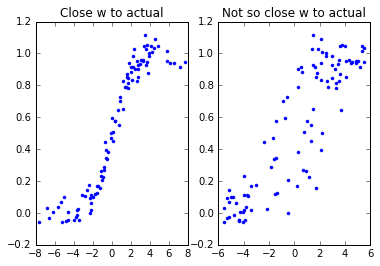

In [18]:
# simple graphing example
from matplotlib import pyplot as plt
%matplotlib inline

plt.subplot(1,2,1)
plt.plot(np.dot(x_rand,w_exact.T),y,'.')
plt.title('Close w to actual')

w_temp = np.array([5.5,0.2])
plt.subplot(1,2,2)
plt.plot(np.dot(x_rand,w_temp.T),y,'.')
plt.title('Not so close w to actual')

In [19]:
# take first pass at optimization via Nelder Mead
from scipy.optimize import minimize
# optimize objective function
w_start = np.random.rand(*w_exact.shape)
w_found = minimize(obj, w_start, method = 'Nelder-Mead', args=(x_rand, y))

print(w_found)
print('Exact values:', w_exact)

 final_simplex: (array([[ 5.15437565,  3.15680068],
       [ 5.15442547,  3.15683257],
       [ 5.15443908,  3.15682873]]), array([ 0.31617365,  0.31617365,  0.31617365]))
           fun: 0.31617365228365896
       message: 'Optimization terminated successfully.'
          nfev: 136
           nit: 71
        status: 0
       success: True
             x: array([ 5.15437565,  3.15680068])
Exact values: [5 3]


___


## Using Optimization for Curve Fitting
We want to optimize the following optimization problem:


$$\hat{y}^{(i)}= \frac{1}{1+\exp(-w \cdot x^{(i)})}$$

$$\text{obj}(w)= \sum_i^N (y^{(i)}-\hat{y}^{(i)})^2$$

The derivative of the objective function is given by:
$$ \frac{\partial}{\partial w_j}\text{obj}(w) = -2 \sum_i^N (y^{(i)}-\hat{y}^{(i)})(1-\hat{y}^{(i)})\hat{y}^{(i)}x_j^{(i)} $$

Which is calculated for every "j" value. We can save the intermediate values of $(y^{(i)}-\hat{y}^{(i)})(1-\hat{y}^{(i)})\hat{y}^{(i)}$ using $\mathbf{y}-\mathbf{\hat{y}})\odot(1-\mathbf{\hat{y}})\odot\mathbf{\hat{y}})^\text{T}$ where where $\odot$ denotes element by element multiplication. The $\mathbf{\hat{y}}$ and $\mathbf{y}$ vectors consist of each element of $i=$ 1 to $N$. Therefore, the equation can be represented for each value of $w$ as:
$$ \frac{\partial}{\partial w_j}\text{obj}(w) = -2\cdot\underbrace{(\mathbf{y}-\mathbf{\hat{y}})\odot(1-\mathbf{\hat{y}})\odot\mathbf{\hat{y}}}_{\text{tmp vector}}\cdot\mathbf{x}_j^{(\forall i)} $$

Which can be written in linear algebra form more compactly, where $\odot$ denotes element by element multiplication:

$$ \nabla\mathbf{w} = -2\cdot((\mathbf{y}-\mathbf{\hat{y}})\odot(1-\mathbf{\hat{y}})\odot\mathbf{\hat{y}})^\text{T}\cdot\mathbf{X} $$


In [21]:
# define gradient without vectorized programming
def obj_gradA(w,x,y):
    grad = []
    yh = yhat(x,w)
    # a not so great implementation of the derivative, lots of for loops
    for j in range(len(w)):
        tmp=0
        for i in range(len(x)):
            tmp = tmp+yh[i]*(y[i]-yh[i])*(1-yh[i])*x[i,j]
        grad.append(-2*tmp)
        
    return np.array(grad)

# add in some vectorization
def obj_gradB(w,x,y):
    grad = []
    yh = yhat(x,w)
    
    # a better implementation of the derivative
    tmp = yh*(y-yh)*(1-yh)
    for j in range(len(w)):
        grad.append(-2*np.sum(tmp*x[:,j]))
        
    return np.array(grad)

#define the gradient in terms of numpy only operations, vectorized
def obj_gradC(w,x,y):
    yh = yhat(x,w)
    return -2*np.dot(yh*(y-yh)*(1-yh),x) 

In [27]:
# Compare the timing for the different gradient methods
w_start = np.random.rand(*w_exact.shape)
%timeit w_found = minimize(obj, w_start, method = 'Nelder-Mead', args=(x_rand, y))
%timeit w_foundA = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradA)
%timeit w_foundB = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradB)
%timeit w_foundC = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradC)

# print out some summary information
print ('Exact values:', w_exact)
print (w_found.x, w_found.nfev)
print (w_foundA.x, w_foundA.nfev)
print (w_foundB.x, w_foundB.nfev)
print (w_foundC.x, w_foundC.nfev)

10 loops, best of 3: 36.9 ms per loop
10 loops, best of 3: 46.6 ms per loop
The slowest run took 11.67 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 10.4 ms per loop
10 loops, best of 3: 9.93 ms per loop
Exact values: [5 3]
[ 5.15442831  3.15682916] 94
[ 5.1543939   3.15680779] 14
[ 5.1543939   3.15680779] 14
[ 5.1543939   3.15680779] 14


Enter a value for the sigmoid slope:6
Enter a value for the noise fraction:0.3
Slope found is: [ 6.86729429]


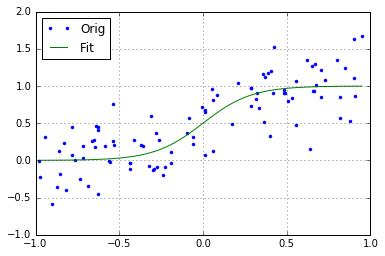

In [29]:
# Okay, so now we have a sigmoid solver, let's do something fun with it

w_exact = np.array([float(input('Enter a value for the sigmoid slope:'))])
x_rand = (np.random.rand(100,w_exact.shape[0])-0.5)*2 # n_rows by n_cols
y = yhat(x_rand,w_exact) # generate a function
y = y + np.random.randn(*y.shape)*float(input('Enter a value for the noise fraction:')) # add random Gaussian noise

w_start = np.random.rand(*w_exact.shape)
w_foundC = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradC, options={'gtol':1e-9})

print('Slope found is:', w_foundC.x)

# now let's plot it
x = np.linspace(np.min(x_rand), np.max(x_rand), 1000) # get 1000 points, ordered
x = x[np.newaxis].T # make into column vector
y_fit = yhat(x,w_foundC.x)

plt.plot(x_rand,y,'.',label='Orig')
plt.plot(x,y_fit,label='Fit')
plt.legend(loc='best')
plt.grid()
plt.show()

Slope found is: [ 10.31049545]


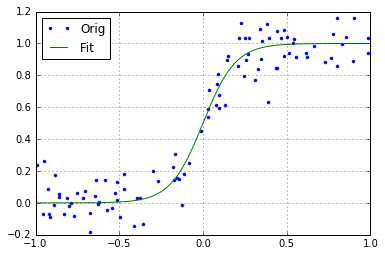

In [30]:
# how about using some actual interactive widgets!!?
import ipywidgets as widgets

def plot_func(w,noise=0.0015):
    w_exact = np.array([w])
    x_rand = (np.random.rand(100,w_exact.shape[0])-0.5)*2 # n_rows by n_cols
    y = yhat(x_rand,w_exact) # generate a function
    y = y + np.random.randn(*y.shape)*noise # add random Gaussian noise

    w_start = np.random.rand(*w_exact.shape)
    w_foundC = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradC, options={'gtol':1e-9})

    print ('Slope found is:', w_foundC.x)

    # now let's plot it
    x = np.linspace(np.min(x_rand), np.max(x_rand), 1000) # get 1000 points, ordered
    x = x[np.newaxis].T # make into column vector
    y_fit = yhat(x,w_foundC.x)

    plt.plot(x_rand,y,'.',label='Orig')
    plt.plot(x,y_fit,label='Fit')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
widgets.interact(plot_func,w=widgets.FloatSlider(min=-10, max=10, step=0.2),
                 noise=widgets.FloatSlider(min=0.0, max=1, step=0.01),
                __manual=True)

# Bonus: Compiling Python via numba

In [31]:
from numba import jit
from scipy.optimize import minimize

# redefine example variables
x_rand = (np.random.rand(100,2)-0.5)*2 # n_rows by n_cols

w_exact = np.array([5,3])
y = yhat(x_rand,w_exact) # generate a function
y = y + np.random.randn(*y.shape)*0.015 # add random Gaussian noise

# define gradient without vectorized programming
@jit
def obj_gradA(w,x,y):
    grad = np.zeros(w.shape)
    yh = yhat(x,w)
    # a not so great implementation of the derivative, lots of for loops
    for j in range(len(w)):
        tmp=0
        for i in range(len(x)):
            tmp = tmp+yh[i]*(y[i]-yh[i])*(1-yh[i])*x[i,j]
        grad[j]= -2*tmp
        
    return grad

%timeit obj_gradA(w_exact,x_rand, y)

The slowest run took 27025.81 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 42.1 µs per loop


In [34]:
# Compare the timing for the different gradient methods
w_start = np.random.rand(*w_exact.shape)

%timeit w_found = minimize(obj, w_start, method = 'Nelder-Mead', args=(x_rand, y))
%timeit w_foundA = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradA)
%timeit w_foundB = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradB)
%timeit w_foundC = minimize(obj, w_start, method='BFGS', args=(x_rand, y), jac=obj_gradC)

# print out some summary information
print ('Exact values:', w_exact)
print (w_found.x, w_found.nfev)
print (w_foundA.x, w_foundA.nfev)
print (w_foundB.x, w_foundB.nfev)
print (w_foundC.x, w_foundC.nfev)

100 loops, best of 3: 8.83 ms per loop
100 loops, best of 3: 3.87 ms per loop
100 loops, best of 3: 3.57 ms per loop
100 loops, best of 3: 3.15 ms per loop
Exact values: [5 3]
[ 5.15442831  3.15682916] 94
[ 5.1543939   3.15680779] 14
[ 5.1543939   3.15680779] 14
[ 6.86729429] 14
